##### Business Sales Analysis

In [132]:
import pandas as pd
import os

In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    print(file)
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

### merging all files into one csv

#### copied directly from vid source

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [173]:
## reading in new file

df=pd.read_csv("all_data_copy.csv")

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Best month for sales? How much earned in that month?

In [204]:
df=df[df['Quantity Ordered']!='Quantity Ordered']

df = df.dropna(how='all')

In [205]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

df['Sales']=df['Quantity Ordered']*df['Price Each']

df['Month']=df['Order Date'].str[:2]

In [206]:
monthly_sales = df.groupby('Month').agg({'Sales':sum})
monthly_sales.sort_values(by='Sales',ascending=False)
## month 12 generated most revenue (4.6 mil), followed by month 10, and so on...

,Sales
Month,
12,4613443.34
10,3736726.88
04,3390670.24
11,3199603.20
05,3152606.75
03,2807100.38
07,2647775.76
06,2577802.26
08,2244467.88


#### Plotting monthly sales

<AxesSubplot:xlabel='Month'>

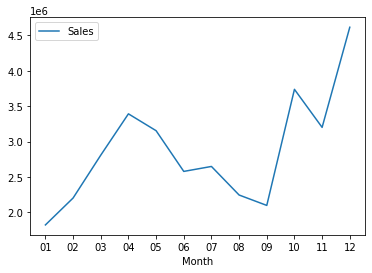

In [207]:
sb.lineplot(data=monthly_sales)

##### City with highest number of sales

In [208]:
df['City']=df['Purchase Address'].str.split(',').str[1]+','+df['Purchase Address'].str.split(',').str[2].str[:3]

city_sales = df.groupby("City").agg({"Sales":sum})

city_sales.sort_values(by='Sales',ascending=False)

# san fran with the highest number of sales

,Sales
City,
"San Francisco, CA",8262203.91
"Los Angeles, CA",5452570.80
"New York City, NY",4664317.43
"Boston, MA",3661642.01
"Atlanta, GA",2795498.58
"Dallas, TX",2767975.40
"Seattle, WA",2747755.48
"Portland, OR",1870732.34
"Austin, TX",1819581.75


##### Plotting sales across cities

<AxesSubplot:title={'center':'Sales across each city'}, xlabel='City', ylabel='Sales'>

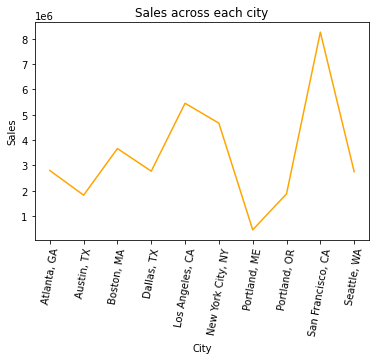

In [209]:
plt.xticks(rotation=80)
plt.title("Sales across each city")
sb.lineplot(data=city_sales,x='City',y='Sales',color='orange')

###### What time should advertisements be displayed to maximize likelihood of customer's buying product?

In [140]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,"Atlanta, GA"


In [210]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<AxesSubplot:title={'center':'# of Orders Per Hour'}, xlabel='Hour', ylabel='# of orders'>

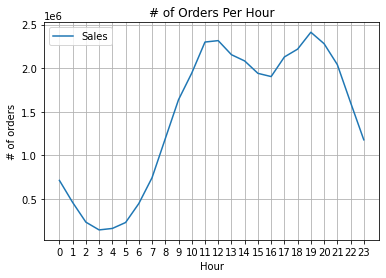

In [211]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
hour_sales=df.groupby("Hour").agg({'Sales':sum}).astype(float)

plt.grid()
plt.ylabel("# of orders")
plt.title('# of Orders Per Hour')
plt.xticks(df['Hour'].unique())
sb.lineplot(data=hour_sales)

## 11am ish and 7pm ish

##### Products most often sold together?

In [212]:
# _ = df.groupby("Order ID").count()

# _.sort_values('Product',ascending=False)


df_ = df[df['Order ID'].duplicated(keep=False)]

df_['Products'] = df_.groupby("Order ID")['Product'].transform(lambda i: ','.join(i)) 

df_ = df_[["Order ID", "Products"]].drop_duplicates() # mutiple rows of same instance (for individual products)

df_

## copied from vid source, getting all products into one column, dropping dupes

/var/folders/2f/4gyn_p7s1570k6cpzp2c3jb00000gn/T/ipykernel_79585/2990825383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Products'] = df_.groupby("Order ID")['Product'].transform(lambda i: ','.join(i))


,Order ID,Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [213]:
dic={}
for i in df_['Products']:
    if i not in dic:
        dic[i]=1
    else:
        dic[i]+=1
        
prod_df = pd.DataFrame(dic, index=[1]) 
display(prod_df)
# iphone/lighting cable, then Google Phone/USB-C charging cable

for i, k in dic.items():
    if k == max(dic.values()):
        print(f'{i}: {k}')
        
## iphone, lighting charging cable was most bought together
    

,"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones","Vareebadd Phone,USB-C Charging Cable","AA Batteries (4-pack),Bose SoundSport Headphones","iPhone,Lightning Charging Cable","iPhone,Apple Airpods Headphones,Wired Headphones","34in Ultrawide Monitor,Lightning Charging Cable","Bose SoundSport Headphones,Wired Headphones","USB-C Charging Cable,Apple Airpods Headphones","Google Phone,USB-C Charging Cable","USB-C Charging Cable,20in Monitor",...,"Google Phone,Wired Headphones,Macbook Pro Laptop","34in Ultrawide Monitor,20in Monitor","Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor","34in Ultrawide Monitor,LG Washing Machine","iPhone,iPhone","Google Phone,27in 4K Gaming Monitor","LG Washing Machine,iPhone","LG Dryer,Wired Headphones","iPhone,Lightning Charging Cable,34in Ultrawide Monitor","Google Phone,Bose SoundSport Headphones,27in FHD Monitor"
1,3,312,28,882,23,18,24,31,856,10,...,1,1,1,1,1,1,1,1,1,1


iPhone,Lightning Charging Cable: 882


#### What product sold the most, and why do you think it sold the most?

<AxesSubplot:xlabel='Product', ylabel='Price Each'>

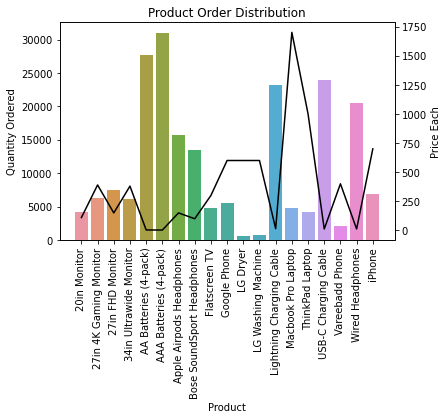

In [253]:
# df['Product'].value_counts().reset_index()

most_sold = df.groupby('Product')[['Product','Quantity Ordered','Sales']].sum().reset_index()
most_sold.sort_values('Quantity Ordered',ascending=False)
## AAA Batteries were most sold item, then AA batteries and so on... 

avg_price = df.groupby("Product")['Price Each'].mean().reset_index()
avg_price.sort_values('Product',ascending=False)


plt.title("Product Order Distribution")
plt.xticks(rotation='vertical')

sb.barplot(data=most_sold,x='Product',y='Quantity Ordered')
ax2 = plt.twinx()
sb.lineplot(data=most_sold,x='Product',y=avg_price['Price Each'],ax=ax2,color='black')

## whenever quantitiy ordered is high, price should be low